In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

### 1. 讀入 Fashion MNSIT 數據集

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### 2. 欣賞數據集內容

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
len(x_train)

60000

In [6]:
len(x_test)

10000

這是 Bag


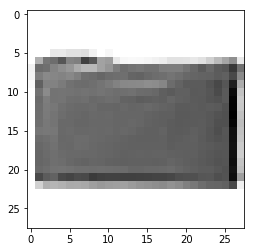

In [7]:
n = 1234
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys');

### 3.資料整理

In [8]:
# 255是因為圖片由0-255組成
x_train=x_train/255
x_test=x_test/255

In [9]:
# .shape():(總資料數,x,x)->x*x元素資料
x_train.shape

(60000, 28, 28)

#### 將資料拉平

In [10]:
# .reshape(資料總數,一個資料的總資料數)
x_train=x_train.reshape(60000,28*28)

In [11]:
x_test=x_test.reshape(10000,28*28)

In [12]:
# 將一般資料變成one-hot encoding
from tensorflow.keras.utils import to_categorical

In [13]:
# 因為有10類1~10
y_train=to_categorical(y_train,10)

In [14]:
y_test=to_categorical(y_test,10)

In [15]:
y_train[9]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### 打造神經網路

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [17]:
model = Sequential()

In [18]:
# 87個神經元，第一層，input_dim為28*28=784
model.add(Dense(1000,input_dim=784,activation='relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [20]:
# 第二層
model.add(Dense(500,activation='relu'))

In [21]:
# 第三層
model.add(Dense(100,activation='relu'))

In [22]:
# 第四層，輸出層，輸出10個結果
model.add(Dense(10,activation='softmax'))

### 4.組裝神經網路

In [23]:
model.compile(loss='mse',optimizer=SGD(lr=0.087),metrics=['accuracy'])

Instructions for updating:
Use tf.cast instead.


### 5.訓練

In [24]:
model.fit(x_train,y_train,batch_size=100,epochs=20)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.0759 - acc: 0.4269
Epoch 2/20
60000/60000 [==============================] - 8s 131us/sample - loss: 0.0444 - acc: 0.6838
Epoch 3/20
60000/60000 [==============================] - 8s 134us/sample - loss: 0.0347 - acc: 0.7709
Epoch 4/20
60000/60000 [==============================] - 8s 135us/sample - loss: 0.0296 - acc: 0.8039
Epoch 5/20
60000/60000 [==============================] - 8s 140us/sample - loss: 0.0270 - acc: 0.8203
Epoch 6/20
60000/60000 [==============================] - 8s 132us/sample - loss: 0.0253 - acc: 0.8294
Epoch 7/20
60000/60000 [==============================] - 8s 134us/sample - loss: 0.0241 - acc: 0.8379
Epoch 8/20
60000/60000 [==============================] - 8s 129us/sample - loss: 0.0233 - acc: 0.8426
Epoch 9/20
60000/60000 [==============================] - 8s 136us/sample - loss: 0.0226 - acc: 0.8472
Epoch 10/20
60000/60000 [=

#### 增加EPOCHS以提高準確率

In [26]:
model.fit(x_train,y_train,batch_size=100,epochs=50)

Epoch 1/50
60000/60000 [==============================] - 11s 176us/sample - loss: 0.0141 - acc: 0.9077
Epoch 2/50
60000/60000 [==============================] - 9s 144us/sample - loss: 0.0140 - acc: 0.9086
Epoch 3/50
60000/60000 [==============================] - 9s 148us/sample - loss: 0.0139 - acc: 0.9085
Epoch 4/50
60000/60000 [==============================] - 9s 146us/sample - loss: 0.0138 - acc: 0.9097
Epoch 5/50
60000/60000 [==============================] - ETA: 0s - loss: 0.0137 - acc: 0.911 - 8s 135us/sample - loss: 0.0136 - acc: 0.9112
Epoch 6/50
60000/60000 [==============================] - 8s 141us/sample - loss: 0.0136 - acc: 0.9109
Epoch 7/50
60000/60000 [==============================] - 9s 157us/sample - loss: 0.0134 - acc: 0.9132
Epoch 8/50
60000/60000 [==============================] - 9s 155us/sample - loss: 0.0134 - acc: 0.9127
Epoch 9/50
60000/60000 [==============================] - 15s 258us/sample - loss: 0.0132 - acc: 0.9140
Epoch 10/50
60000/60000 [========

In [27]:
model.fit(x_train,y_train,batch_size=100,epochs=100)

Epoch 1/100
60000/60000 [==============================] - 8s 128us/sample - loss: 0.0094 - acc: 0.9413s - loss: 0.0094 - acc: 0
Epoch 2/100
60000/60000 [==============================] - 7s 124us/sample - loss: 0.0093 - acc: 0.9420
Epoch 3/100
60000/60000 [==============================] - 8s 135us/sample - loss: 0.0092 - acc: 0.9431
Epoch 4/100
60000/60000 [==============================] - 8s 125us/sample - loss: 0.0092 - acc: 0.9429
Epoch 5/100
60000/60000 [==============================] - 8s 131us/sample - loss: 0.0089 - acc: 0.9460
Epoch 6/100
60000/60000 [==============================] - 7s 125us/sample - loss: 0.0089 - acc: 0.9448
Epoch 7/100
60000/60000 [==============================] - 8s 131us/sample - loss: 0.0087 - acc: 0.9466
Epoch 8/100
60000/60000 [==============================] - 8s 126us/sample - loss: 0.0088 - acc: 0.9461
Epoch 9/100
60000/60000 [==============================] - 8s 132us/sample - loss: 0.0087 - acc: 0.9472s - loss:
Epoch 10/100
60000/60000 [====

60000/60000 [==============================] - 7s 123us/sample - loss: 0.0046 - acc: 0.9739
Epoch 77/100
60000/60000 [==============================] - 7s 123us/sample - loss: 0.0045 - acc: 0.9742
Epoch 78/100
60000/60000 [==============================] - 9s 145us/sample - loss: 0.0044 - acc: 0.9746
Epoch 79/100
60000/60000 [==============================] - 8s 141us/sample - loss: 0.0044 - acc: 0.9749
Epoch 80/100
60000/60000 [==============================] - 7s 120us/sample - loss: 0.0043 - acc: 0.9751
Epoch 81/100
60000/60000 [==============================] - 9s 155us/sample - loss: 0.0042 - acc: 0.9760
Epoch 82/100
60000/60000 [==============================] - 8s 134us/sample - loss: 0.0044 - acc: 0.9750
Epoch 83/100
60000/60000 [==============================] - 7s 123us/sample - loss: 0.0041 - acc: 0.9767s - loss: 0.0041 - acc:
Epoch 84/100
60000/60000 [==============================] - 7s 124us/sample - loss: 0.0042 - acc: 0.9758
Epoch 85/100
60000/60000 [===================

#### 經由提高epochs將準確率提高至0.9802

### 6.訓練成果

In [28]:
result=model.predict_classes(x_test)

神經網路預測是: T-shirt/top


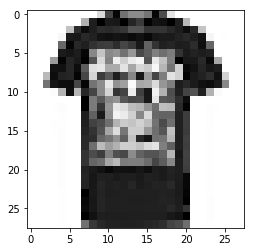

In [31]:
n=5246

print('神經網路預測是:',class_names[result[n]])
# reshape:將拉平的資料回復原狀
plt.imshow(x_test[n].reshape(28,28),cmap='Greys')

神經網路預測是: Sandal


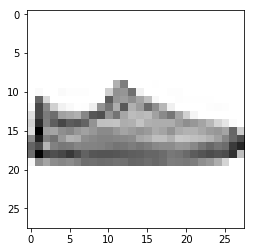

In [33]:
n=12
print('神經網路預測是:',class_names[result[n]])
# reshape:將拉平的資料回復原狀
plt.imshow(x_test[n].reshape(28,28),cmap='Greys')

神經網路預測是: Coat


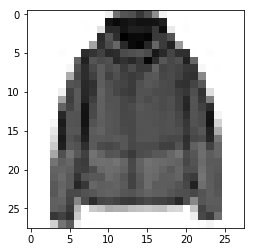

In [34]:
n=649
print('神經網路預測是:',class_names[result[n]])
# reshape:將拉平的資料回復原狀
plt.imshow(x_test[n].reshape(28,28),cmap='Greys')